In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sktime.classification.deep_learning.inceptiontime import InceptionTimeClassifier
from pathlib import Path
from stroke import Stroke
from constants import *
import os
from services.prepare_data_for_training import prepare_data_for_training
from services.plot_confusion_matrix import plotConfusionMatrix
from sktime.classification.shapelet_based import ShapeletTransformClassifier
from scipy.special import softmax

In [2]:
pathToTestCSV = '/Users/nathansadoun/Desktop/INSA/ML/Video_classification/MediaEval_ClassificationTask/dataSetCSV/validation'

In [5]:
# For validation set
strokeList = []

for subfolder in sorted(os.listdir(pathToTestCSV)):
    if subfolder in SELECTED_TRICKS:
        pathToSubFolder = os.path.join(pathToTestCSV, subfolder)
        for file in sorted(os.listdir(pathToSubFolder)):
                strokeData = pd.read_csv(os.path.join(pathToSubFolder, file), delimiter=';', decimal='.')
                stroke = Stroke(data=strokeData, label=subfolder, id=file)

                stroke.normalize()

                strokeList.append(stroke)

In [4]:
# For test set
strokeList = []

for file in sorted(os.listdir(pathToTestCSV)):
        strokeData = pd.read_csv(os.path.join(pathToTestCSV, file), delimiter=';', decimal='.')
        stroke = Stroke(data=strokeData, id=file)

        stroke.normalize()

        strokeList.append(stroke)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 27: invalid start byte

In [6]:
incepPath = Path('/Users/nathansadoun/Desktop/INSA/ML/Video_classification/MediaEval_ClassificationTask/pose_estimation_classification/models/modelsinception_80.zip')
shapPath = Path('/Users/nathansadoun/Desktop/INSA/ML/Video_classification/MediaEval_ClassificationTask/pose_estimation_classification/models/modelsshapelet_80.zip')

incep = InceptionTimeClassifier.load_from_path(incepPath)
shap = ShapeletTransformClassifier.load_from_path(shapPath)

In [31]:
listprobaIncep = []
listprobaShap = []

listPred = []
for s in strokeList:
    
    X = np.array(s.data[SELECTED_FEATURES]).reshape(1, s.data[SELECTED_FEATURES].shape[0], s.data[SELECTED_FEATURES].shape[1])
    X = np.nan_to_num(X)

    yIncep = incep.predict_proba(X)
    yShap = shap.predict_proba(X)

    predIncep = np.argmax(yIncep)
    predShap = np.argmax(yShap)

    if predIncep != predShap:
        if np.max(yIncep) >= np.max(yShap):
            listPred.append(predIncep)
        else:
             listPred.append(predShap)
    else:
        listPred.append(predIncep)

    listprobaIncep.append(yIncep)
    listprobaShap.append(yShap)

    #s.predictedLabel = CLASS_TO_STROKE[y[0]]


1/1 [==============================] - 0s 10ms/step


In [74]:
listPredSum = []
listPredWSum = []
listPredMax = []
listPredProd = []

for i in range(len(listprobaIncep)):

    incep = listprobaIncep[i][0]
    shap = listprobaShap[i][0]
    lenght = len(incep)

    sum = []
    for j in range(lenght):
        sum.append( (incep[j] + shap[j]) / 2 )
    listPredSum.append(sum)

    sumw = []
    for j in range(lenght):
        sumw.append( 0.4*incep[j] + 0.6*shap[j] )
    listPredWSum.append(sumw)

    pmax = []
    for j in range(lenght):
        pmax.append( max(incep[j], shap[j]) )
    listPredMax.append(pmax)

    prod = []
    for j in range(lenght):
        prod.append( incep[j] * shap[j] )
    listPredProd.append(prod)



In [73]:
max(listprobaIncep[1][0][0], listprobaShap[1][0][0])

0.005

In [55]:
listPredSum

[[0.0025000008839472488,
  1.3517507946314566e-10,
  0.010000017010806985,
  0.037500003433458405,
  0.02503521779945004,
  0.010000023962419604,
  0.01750000032157166,
  0.03506968942761887,
  0.0025000006861980984,
  0.0025000000476022035,
  0.007500002243049746,
  0.012500014556664319,
  0.007500008819688979,
  0.005000000448306253,
  0.002500209613858715,
  0.002500001051380427,
  1.520938752719303e-07,
  2.9341431400098372e-06,
  0.0025003315724370623,
  0.8048913705348968],
 [0.00250001473325284,
  0.005000647250999464,
  0.0025000844356051744,
  0.020022908350729268,
  0.002500079712414447,
  0.015000059172752031,
  0.015000013876214843,
  0.007500286800400317,
  3.0980530141277995e-08,
  0.0025033762310067687,
  0.005000154404716568,
  0.08123315991368145,
  0.017501271451765207,
  0.020000010594208178,
  3.875083791626821e-07,
  4.162090672110708e-09,
  9.640622522510967e-08,
  3.4288068491150625e-06,
  0.012500503051921897,
  0.726229407787323],
 [0.007500001364788615,
  1.19

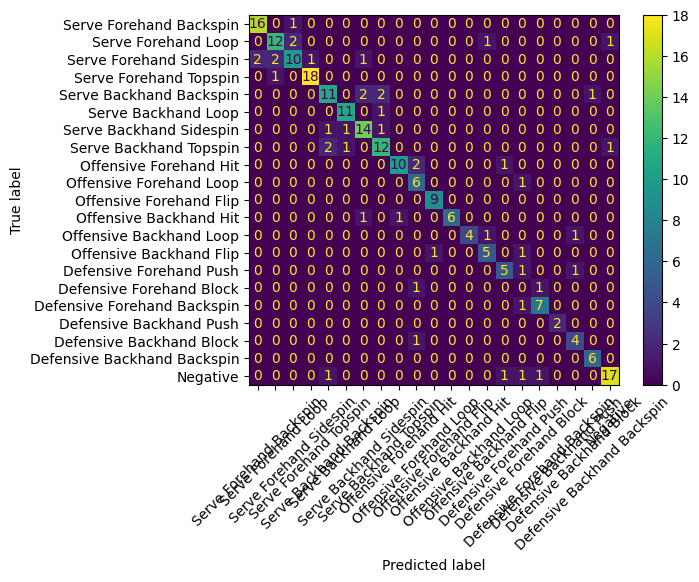

In [20]:
listeClassEncoded = [STROKE_TO_CLASS[s.label] for s in strokeList]
listePrediction = [np.argmax(s) for s in listprobaIncep]
plotConfusionMatrix(listeClassEncoded, listePrediction, listClasses=STROKE_TO_CLASS)

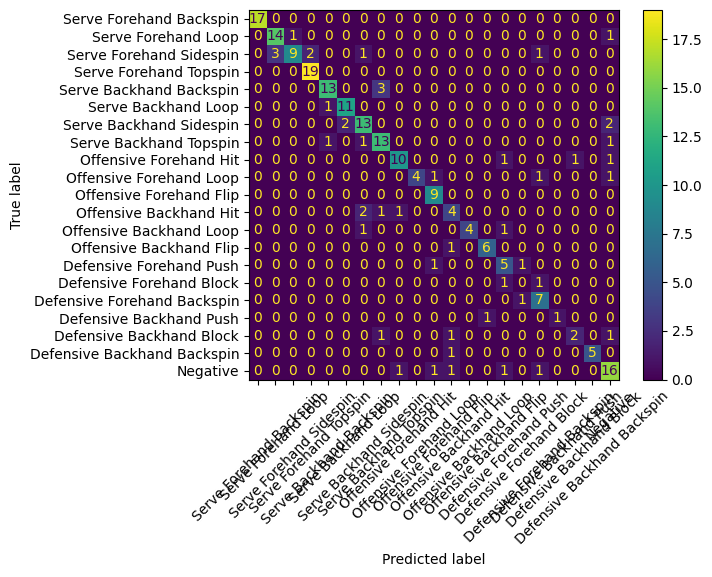

In [24]:
listePrediction2 = [np.argmax(s) for s in listprobaShap]
plotConfusionMatrix(listeClassEncoded, listePrediction2, listClasses=STROKE_TO_CLASS)

In [30]:
listepred3 = []
for i in range(len(listPred)):    

    predIncep = np.argmax(listprobaIncep[i])
    predShap = np.argmax(listprobaShap[i])

    if predIncep != predShap:
        listepred3.append(predShap)
    else:
        listepred3.append(predIncep)

print(listepred3)

[19, 19, 19, 19, 11, 19, 18, 18, 7, 20, 11, 13, 17, 16, 16, 16, 16, 16, 16, 15, 16, 16, 14, 14, 10, 14, 14, 15, 14, 14, 20, 20, 20, 20, 16, 20, 14, 20, 20, 20, 20, 20, 20, 20, 10, 20, 20, 11, 20, 20]


In [75]:
len(listPredSum)

230

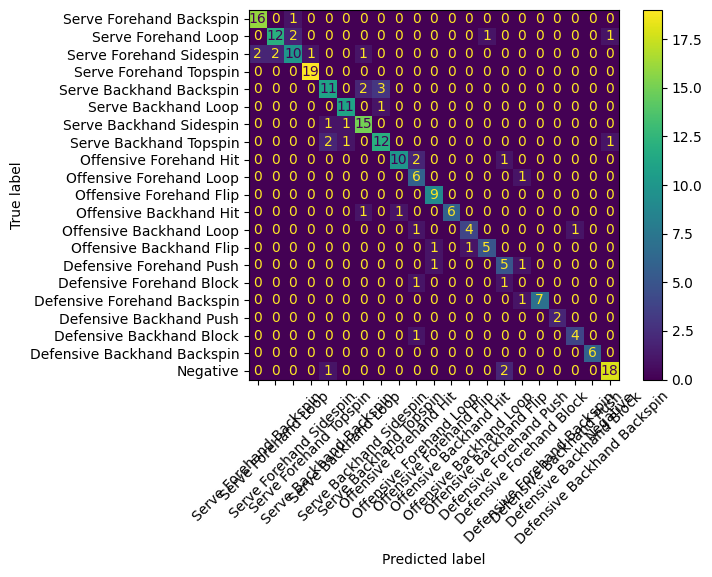

In [86]:
liste = [np.argmax(l) for l in listPredProd]
plotConfusionMatrix(listeClassEncoded, liste, listClasses=STROKE_TO_CLASS)

In [87]:
somme = 0
for l in range(len(liste)):
    if liste[l] != listeClassEncoded[l]:
        somme += 1

print(1-somme/230)

0.817391304347826
